# Backpropagation

## Part I. Classic

#### imports

Do a forward pass (calculate green values), and a backward pass (calculate gradients, red
values).

In [ ]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

### task

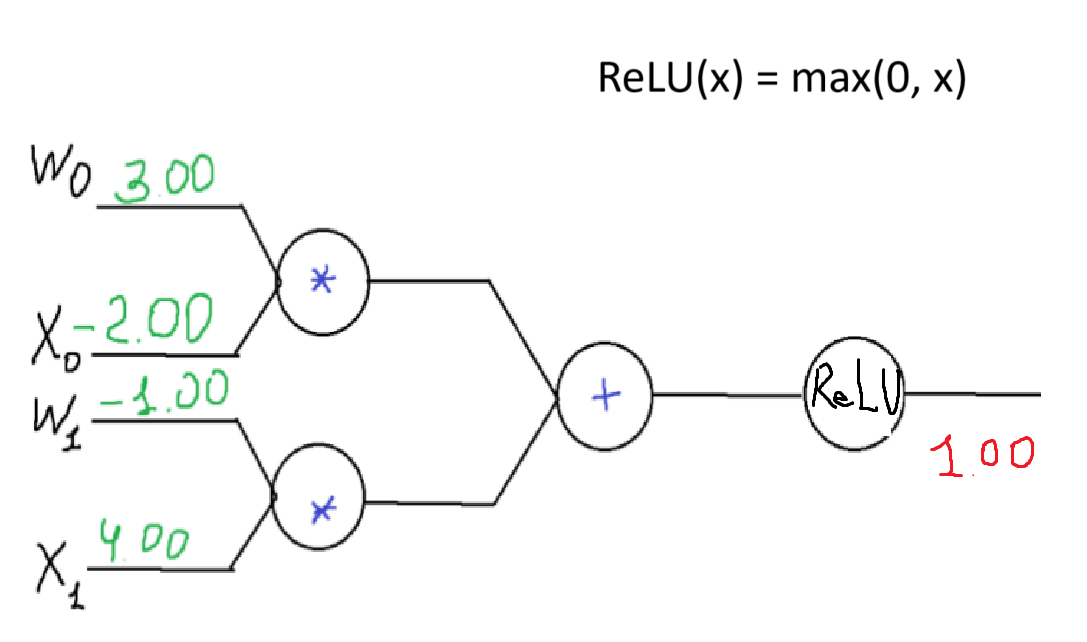

In [ ]:
Image('/content/HA4_backprop.png', width=543, height=321)

### forward pass

- input values

In [ ]:
# upper way
x0 = -2
w0 = 3
# lower way
x1 = 4
w1 = -1

In [ ]:
# forward pass
z = w0 * x0 + w1 * x1
# ReLU
a = max(0, z)

- results

In [ ]:
print('Forward Pass Input Values:')
print(f'x0 = {x0}; x1 = {x1} \nw0 = {w0};  w1 = {w1}')
print(f'z = w0 * x0 + w1 * x1')
print(f'a (ReLU) = max(0, z)\n')

print('Forward Pass Results:')
print(f'z = {z}')
print(f'a = {a}')

Forward Pass Input Values:
x0 = -2; x1 = 4 
w0 = 3;  w1 = -1
z = w0 * x0 + w1 * x1
a (ReLU) = max(0, z)

Forward Pass Results:
z = -10
a = 0


### backward pass

- counting gradient

In [ ]:
# target result
trgt = 0
# gradients
# for activation
dL_da = -2 * (trgt - a)
# for ReLU
if z > 0:
    da_dz = 1  # ReLU'
else:
    da_dz = 0

# for z
dL_dz = dL_da * da_dz
# for weights and values
dL_dw0 = dL_dz * x0  # w0
dL_dw1 = dL_dz * x1  # w1
dL_dx0 = dL_dz * w0  # x0
dL_dx1 = dL_dz * w1  # x1

- results

In [ ]:
print('Backward Pass Results:')
print(f'dL/da =  {dL_da}')
print(f'da/dz =  {da_dz}')
print(f'dL/dz =  {dL_dz}')
print(f'dL/dw0 = {dL_dw0}')
print(f'dL/dw1 = {dL_dw1}')
print(f'dL/dx0 = {dL_dx0}')
print(f'dL/dx1 = {dL_dx1}')

Backward Pass Results:
dL/da =  0
da/dz =  0
dL/dz =  0
dL/dw0 = 0
dL/dw1 = 0
dL/dx0 = 0
dL/dx1 = 0


## Part II. Some coding bits

In [ ]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

- input values

In [ ]:
x = 1
actual = gaussian(x)

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

### forward pass

In [ ]:
z_2, z_3 = 0, 0
def forward():
    global z_2, z_3

    z_2 = affine(x, w_1, b_1)
    h_1_2 = sigmoid(z_2)
    z_3 = np.dot(h_1_2, w_2) + b_2[0]

In [ ]:
forward()

- results

In [ ]:
print('Forward Pass Results:\n')
print(f'Actual value: {actual}')
print(f'Final result: {z_3}')

loss1 = mse(actual, z_3)
print(f'Mean Squared Error: {loss1}')

Forward Pass Results:

Actual value: 0.36787944117144233
Final result: 1.3807970779778822
Mean Squared Error: 1.0260021389535428


Is the output of the network close to the actual value?

*The actual value is 0.3679.\
The network's output is 1.38, which is not very close to the actual value.\
A higher MSE (1.03) indicates that the network has a noticeable error in its predictions.*

### backward pass

In [ ]:
def backward():
    global w_1, w_2, b_1, b_2
    global z_2, z_3, x, actual
    lr = 0.01

    #### DERIVATIVES CALCULATION
    # second layer
    d_3 = 2 * (z_3 - actual)
    dw_2 = d_3 * sigmoid(z_2)
    db_2 = d_3

    # first layer
    d_2 = d_3 * w_2 * sigmoid_derivative(z_2)
    dw_1 = d_2 * x
    db_1 = d_2

    ##### WEIGHTS UPDATE
    w_1 -= lr * dw_1
    w_2 -= lr * dw_2
    b_1 -= lr * db_1
    b_2 -= lr * db_2

In [ ]:
backward()
forward()

- weights

In [ ]:
print('Updated Weights and Biases:')
print(f'w_1 = {w_1[0]}, {w_1[1]}')
print(f'b_1 = {b_1[0]}')
print(f'w_2 = {w_2[0]}, {w_2[1]}')
print(f'b_2 = {b_2[0]}')

Updated Weights and Biases:
w_1 = 0.9978730029118649, -0.9949354118159678
b_1 = 0.9978730029118649
w_2 = 0.9821565021053725, -1.0101291763680644
b_2 = 0.9797416472638713


- results

In [ ]:
print('Results after applying Backward Pass:\n')
print(f'Actual value: {actual}')
print(f'Final result: {z_3}')

loss2 = mse(actual, z_3)
print(f'Mean Squared Error: {loss2}')

Results after applying Backward Pass:

Actual value: 0.36787944117144233
Final result: 1.3367603304339668
Mean Squared Error: 0.9387301775781403


### comparing mse before/after updating values

In [ ]:
print(f'Loss before update: {loss1}')
print(f'Loss after update:  {loss2}')

Loss before update: 1.0260021389535428
Loss after update:  0.9387301775781403


Did output become closer to the actual value of the function?

Yes, the MSE decreased from 1.03 to 0.94.\
This means that the network's predictions are now more accurate and better approximate the actual value of the function.

### wrap things into a loop

In [ ]:
N = 50000
lr = 0.01

In [ ]:
X = np.linspace(-5.0, 5.0, 500)

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [ ]:
for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)
    #### FORWARD PASS
    z_2 = affine(x, w_1, b_1)
    h_1_2 = sigmoid(z_2)
    z_3 = np.dot(h_1_2, w_2) + b_2[0]

    #### DERIVATIVES CALCULATION
    # second layer
    d_3 = 2 * (z_3 - actual)
    dw_2 = d_3 * sigmoid(z_2)
    db_2 = d_3

    # first layer
    d_2 = d_3 * w_2 * sigmoid_derivative(z_2)
    dw_1 = d_2 * x
    db_1 = d_2

    ##### WEIGHTS UPDATE
    w_1 -= lr * dw_1
    w_2 -= lr * dw_2
    b_1 -= lr * db_1
    b_2 -= lr * db_2

In [ ]:
print(f'Actual value:  {actual:.10f}')
print(f'Final result: {z_3}')

loss3 = np.mean(np.abs(actual - z_3))
print(f'Mean Absolute Error: {loss3}')

Actual value:  0.0000000309
Final result: -0.0005457869351744364
Mean Absolute Error: 0.0005458178633814066


As we can see the final result is veeeery close to actual value after using the loop!

Now let's plot things and see what they look like.

In [ ]:
# here i'm using X not x bc if not then we can't show a proper 'percenton' plot
z1 = w_1[0] * X + b_1[0]
z2 = w_1[1] * X + b_1[1]

h1 = sigmoid(z1)
h2 = sigmoid(z2)

out = w_2[0] * h1 + w_2[1] * h2 + b_2

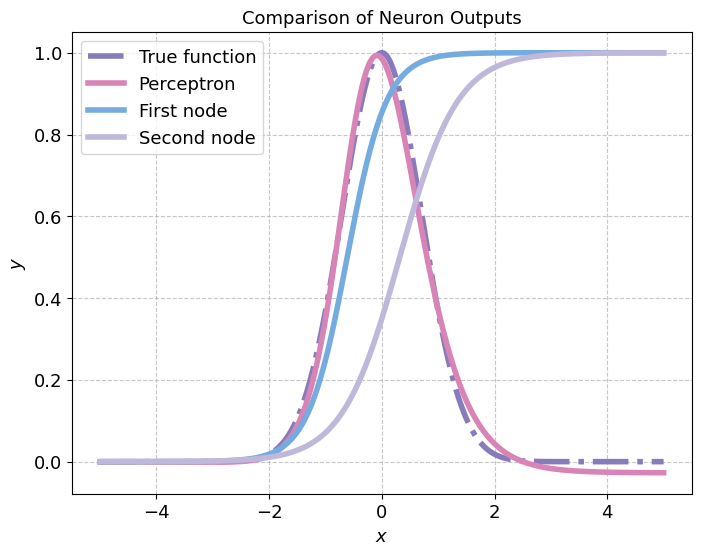

In [ ]:
SIZE = 13

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function', color='#887bba')
ax.plot(X, out, lw=4, label='Perceptron', color='#d984b7')
ax.plot(X, h1, lw=4, label='First node', color='#75ace0')
ax.plot(X, h2, lw=4, label='Second node', color='#bfb8da')
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)
ax.grid(linestyle='--', alpha=0.7)
ax.legend(fontsize=SIZE, loc='best')
plt.show()

### Classification problem

Fill out the code for the following classification problem. Implement:
- foward pass
- backward pass
- weight updates

#### imports 2

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

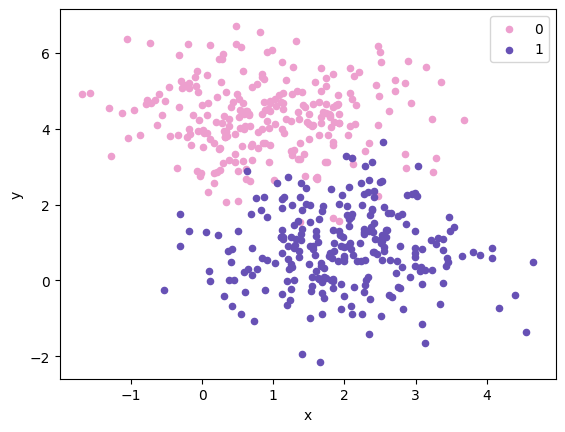

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'#ed9fce', 1:'#6751b5'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
x = X_test

In [ ]:
##### initialization ('ones')
w_1 = np.array([1, 1])
b_1 = np.array([1])

In [ ]:
z1 = np.dot(x, w_1) + b_1

# Node outputs
h1 = sigmoid(z1)

### Check the accuracy

In [ ]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test) / len(y_test)

0.45

### generalization ==> wrap into a proper loop

In [ ]:
N = 10000 # epochs

In [ ]:
batch_size = 10 # 2, 4, 8, 16, 32, ... 10 is also an example

##### initialization

w_1 = np.array([1.,1.])
b_1 = np.array([1.])


for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
        y = y_train[batch_id*batch_size:(batch_id+1)*batch_size]

        m = x.shape[0]
        #### FORWARD PASS
        z_1 = np.dot(x, w_1) + b_1
        h_1 = sigmoid(z_1)


        #### DERIVATIVES CALCULATION
        dw1 = np.dot(x.T, (h_1 - y)) / m
        db1 = np.sum(h_1 - y) / m


        ##### WEIGHTS UPDATE
        w_1 -= lr * dw1
        b_1 -= lr * db1

In [ ]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)

0.95